In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from astropy.table import Table
t = Table.read('../chains/' + 'posteriors.dat', format='ascii')

In [3]:
mag_bins = np.array([-17,-18,-19,-20,-21,-22,-23])
mag_lims = mag_bins[:-1]
bin_centers = (mag_bins[:-1] + mag_bins[1:])/2.0

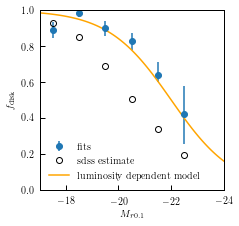

In [16]:
# load estimate of disk fraction from SDSS
from astropy.table import Table
tt = Table.read('../../../sdss_measurements/data/disk_fraction.dat', format='ascii')

# model for fraction of disk and elliptical galaxies
from galaxy_shapes.shape_models.morphology_model_components import Morphology_2
morpholopgy_model = Morphology_2()
morpholopgy_model.param_dict['morphology_m0'] = -22.0
morpholopgy_model.param_dict['morphology_sigma'] = 1.2

# sample from luminosity dependent model
x = np.linspace(-16,-24,100)
y = morpholopgy_model.disk_fraction(x)

fig = plt.figure(figsize=(3.3,3.3))
p1 = plt.errorbar(bin_centers, t['col25'],
                        [t['col25']-t['col26'], t['col27']-t['col25']], fmt='o')
p2, = plt.plot(tt['mag'],tt['f_disk'],
               'o', color='black', markerfacecolor="None")
p3, = plt.plot(x, y, '-', color='orange')
plt.ylim([0,1])
plt.xlim([-17,-24])
plt.ylabel(r'$f_{\rm disk}$')
plt.xlabel(r'$M_{r0.1}$')
plt.legend([p1,p2,p3],['fits','sdss estimate','luminosity dependent model'],
           frameon=False, loc='lower left')
plt.show()

fpath = './figures/'
fname = 'disk_fraction_trend.pdf'
fig.savefig(fpath + fname, dpi=250)

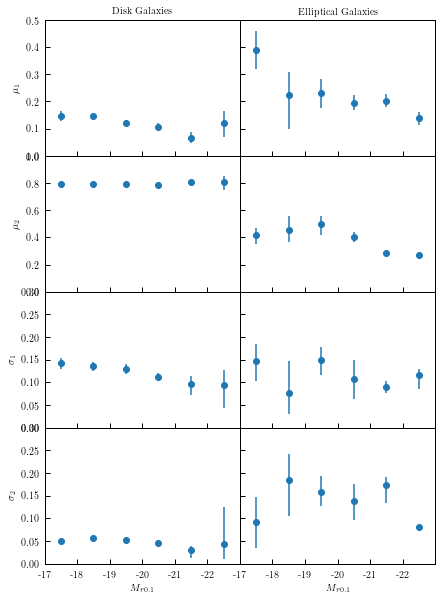

In [17]:
fig, axes = plt.subplots(4, 2, figsize=(7.0,10.0), sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)

# column1
ax = axes[0,0]
ax.set_title('Disk Galaxies')
ax.errorbar(bin_centers, t['col1'], [t['col1']-t['col2'], t['col3']-t['col1']], fmt='o')
ax.set_ylim([0,0.5])
ax.set_xlim([-17,-23])
ax.set_ylabel(r'$\mu_1$')

ax = axes[1,0]
ax.errorbar(bin_centers, t['col4'], [t['col4']-t['col5'], t['col6']-t['col4']], fmt='o')
ax.set_ylim([0,1])
ax.set_xlim([-17,-23])
ax.set_ylabel(r'$\mu_2$')

ax = axes[2,0]
ax.errorbar(bin_centers, t['col7'], [t['col7']-t['col8'], t['col9']-t['col7']], fmt='o')
ax.set_ylim([0.0,.3])
ax.set_xlim([-17,-23])
ax.set_ylabel(r'$\sigma_1$')

ax = axes[3,0]
ax.errorbar(bin_centers, t['col10'], [t['col10']-t['col11'], t['col12']-t['col10']], fmt='o')
ax.set_ylim([0.0,.3])
ax.set_xlim([-17,-23])
ax.set_ylabel(r'$\sigma_2$')
ax.set_xlabel(r'$M_{r0.1}$')
ax.set_xticklabels(['-17','-18','-19','-20','-21','-22',''][::-1])

#column 2
ax = axes[0,1]
ax.set_title('Elliptical Galaxies')
ax.errorbar(bin_centers, t['col13'], [t['col13']-t['col14'], t['col15']-t['col13']], fmt='o')
ax.set_ylim([0,0.5])
ax.set_xlim([-17,-23])
ax.set_yticklabels([])

ax = axes[1,1]
ax.errorbar(bin_centers, t['col16'], [t['col16']-t['col17'], t['col18']-t['col16']], fmt='o')
ax.set_ylim([0,1])
ax.set_xlim([-17,-23])
ax.set_yticklabels([])

ax = axes[2,1]
ax.errorbar(bin_centers, t['col19'], [t['col19']-t['col20'], t['col21']-t['col19']], fmt='o')
ax.set_ylim([0.0,.3])
ax.set_xlim([-17,-23])
#ax.set_yscale('log')
ax.set_yticklabels([])

ax = axes[3,1]
ax.errorbar(bin_centers, t['col22'], [t['col22']-t['col23'],t['col24']-t['col22']], fmt='o')
ax.set_ylim([0.0,.3])
ax.set_xlim([-17,-23])
#ax.set_yscale('log')
ax.set_yticklabels([])
ax.set_xlabel(r'$M_{r0.1}$')

plt.show()

fpath = './figures/'
fname = 'parameter_trends.pdf'
fig.savefig(fpath + fname, dpi=250)

In [ ]:
from astropy.table import Table
from galaxy_shapes.model_fitting.fit_1.make_mock import make_galaxy_sample

samples = ['sample_1', 'sample_2', 'sample_3', 'sample_4', 'sample_5', 'sample_6']

fig, axes = plt.subplots(2, 3, figsize=(8.0,5.0), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0, hspace=0)

axes = axes.flatten()
for i, sample in enumerate(samples):
    
    mag_lim = mag_lims[i]
    
    ax = axes[i]
    tt = Table.read('../../../sdss_measurements/data/'+sample+'_all_DEV_shapes.dat', format='ascii')
    p1 = ax.errorbar(tt['q'], tt['frequency'], tt['err'], fmt='o', ms=4, color='black')
    
    d = {'disk_shape_mu_1_centrals': t['col1'][i],
         'disk_shape_mu_2_centrals': t['col4'][i],
         'disk_shape_sigma_1_centrals': t['col7'][i],
         'disk_shape_sigma_2_centrals': t['col10'][i],
         'elliptical_shape_mu_1_centrals': t['col13'][i],
         'elliptical_shape_mu_2_centrals': t['col16'][i],
         'elliptical_shape_sigma_1_centrals': t['col19'][i],
         'elliptical_shape_sigma_2_centrals': t['col22'][i],
         'f_disk': t['col25'][i]}
    mock = make_galaxy_sample(mag_lim=mag_lim, size=10**6, **d)
    
    # measure shape distribution
    bins = np.linspace(0,1,40)
    bin_centers = (bins[:-1]+bins[1:])/2.0
    
    mag_key = 'obs_Mag_r'
    mask = (mock[mag_key]<mag_lim) & (mock[mag_key]>(mag_lim-1.0))
    
    disks = mock['disk'] == True
    ellipticals = mock['elliptical'] == True
    
    w = mock['weight']
    
    x = mock['galaxy_projected_b_to_a']
    counts = np.histogram(x[mask], bins=bins,
                          weights=w[mask])[0]
    n = np.sum(counts)
    counts = 1.0*counts/np.sum(counts)/np.diff(bins)
    l1, = ax.plot(bin_centers, counts, color='black')
    
    counts_1 = np.histogram(x[mask & disks], bins=bins,
                            weights=w[mask & disks])[0]
    counts_1 = 1.0*counts_1/n/np.diff(bins)
    l2, = ax.plot(bin_centers, counts_1, color='blue')
    
    counts_2 = np.histogram(x[mask & ellipticals], bins=bins,
                            weights=w[mask & ellipticals])[0]
    counts_2 = 1.0*counts_2/n/np.diff(bins)
    l3, = ax.plot(bin_centers, counts_2, color='red')
    
    mag_key = 'Mag_r'
    mask = (mock[mag_key]<mag_lim) & (mock[mag_key]>(mag_lim-1.0))
    
    counts_11 = np.histogram(x[mask & disks], bins=bins,
                             weights=w[mask & disks])[0]
    counts_11 = 1.0*counts_11/n/np.diff(bins)
    l4, = ax.plot(bin_centers, counts_11, '--', color='blue')

    
axes[0].set_title(r'$-17>M_r>-18$')
axes[1].set_title(r'$-18>M_r>-19$')
axes[2].set_title(r'$-19>M_r>-20$')
axes[3].text(0.2, 2.8, r'$-20>M_r>-21$')
axes[3].set_xlabel('projected a/b')
axes[4].text(0.2, 2.8, r'$-21>M_r>-22$')
axes[4].set_xlabel('projected a/b')
axes[5].text(0.2, 2.8, r'$-22>M_r>-23$')
axes[5].set_xlabel('projected a/b')
axes[5].set_xticks([0,0.2,0.4,0.6,0.8])
axes[5].set_xlim([0,1])

axes[0].legend([p1],['SDSS'],
               frameon=False, loc='upper left')
axes[1].legend([l1,l2,l3],['total','disk', 'elliptical'],
               frameon=False, loc='upper left')
axes[2].legend([l4],['disk w/o extinction'],
               frameon=False, loc='upper left')

plt.show()

fpath = './figures/'
fname = 'model_fits.pdf'
fig.savefig(fpath + fname, dpi=250)

[0. 1. 1. 1.]
[0.2 0.8 1.  1. ]
[0.4 0.6 1.  1. ]
[0.6 0.4 1.  1. ]
[0.8 0.2 1.  1. ]
[1. 0. 1. 1.]


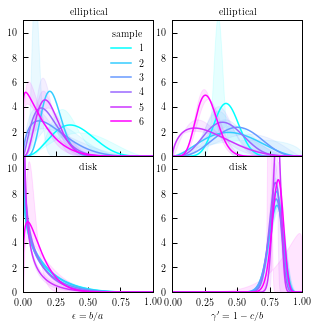

In [7]:
from galaxy_shapes.shape_models.shape_model_components import EllipticalGalaxyShapes, DiskGalaxyShapes
elliptical_shape_model = EllipticalGalaxyShapes()
disk_shape_model       = DiskGalaxyShapes()
elliptical_shape_model_l = EllipticalGalaxyShapes()
disk_shape_model_l     = DiskGalaxyShapes()
elliptical_shape_model_h = EllipticalGalaxyShapes()
disk_shape_model_h       = DiskGalaxyShapes()

fig, axes = plt.subplots(2, 2, figsize=(5.0,5.0), sharex=True)
plt.subplots_adjust(wspace=0.15, hspace=0)

x = np.linspace(0,1,1000)
axes = axes.flatten()
lines = []
for i, sample in enumerate(samples):

    d = {'disk_shape_mu_1_centrals': t['col1'][i],
         'disk_shape_mu_2_centrals': t['col4'][i],
         'disk_shape_sigma_1_centrals': t['col7'][i],
         'disk_shape_sigma_2_centrals': t['col10'][i],
         'elliptical_shape_mu_1_centrals': t['col13'][i],
         'elliptical_shape_mu_2_centrals': t['col16'][i],
         'elliptical_shape_sigma_1_centrals': t['col19'][i],
         'elliptical_shape_sigma_2_centrals': t['col22'][i],
         'f_disk': t['col25'][i]}
    dl = {'disk_shape_mu_1_centrals': t['col2'][i],
         'disk_shape_mu_2_centrals': t['col5'][i],
         'disk_shape_sigma_1_centrals': t['col8'][i],
         'disk_shape_sigma_2_centrals': t['col11'][i],
         'elliptical_shape_mu_1_centrals': t['col14'][i],
         'elliptical_shape_mu_2_centrals': t['col17'][i],
         'elliptical_shape_sigma_1_centrals': t['col20'][i],
         'elliptical_shape_sigma_2_centrals': t['col23'][i],
         'f_disk': t['col25'][i]}
    dh = {'disk_shape_mu_1_centrals': t['col3'][i],
         'disk_shape_mu_2_centrals': t['col6'][i],
         'disk_shape_sigma_1_centrals': t['col9'][i],
         'disk_shape_sigma_2_centrals': t['col12'][i],
         'elliptical_shape_mu_1_centrals': t['col15'][i],
         'elliptical_shape_mu_2_centrals': t['col18'][i],
         'elliptical_shape_sigma_1_centrals': t['col21'][i],
         'elliptical_shape_sigma_2_centrals': t['col24'][i],
         'f_disk': t['col25'][i]}
    
    for key in disk_shape_model.param_dict.keys():
        disk_shape_model.param_dict[key] = d[key]
        disk_shape_model_l.param_dict[key] = dl[key]
        disk_shape_model_h.param_dict[key] = dh[key]
    for key in elliptical_shape_model.param_dict.keys():
        elliptical_shape_model.param_dict[key] = d[key]
        elliptical_shape_model_l.param_dict[key] = dl[key]
        elliptical_shape_model_h.param_dict[key] = dh[key]
    
    color = plt.cm.cool(np.linspace(0,1,6))[i]
    print(color)
    
    ax = axes[0]
    ax.set_title('elliptical', fontsize=10)
    #ax.text(0.4,25, 'elliptical', fontsize=10)
    p = elliptical_shape_model.epsilon_pdf(x)
    pl = elliptical_shape_model_l.epsilon_pdf(x)
    ph = elliptical_shape_model_h.epsilon_pdf(x)
    l, = ax.plot(x, p, color=color)
    ax.fill_between(x, pl, ph, color=color, alpha=0.1)
    #ax.set_yscale('log')
    #ax.set_ylim([0.01,50])
    ax.set_ylim([0.0,11])
    ax.set_xlim([0,1])
    
    lines.append(l)

    ax = axes[1]
    ax.set_title('elliptical', fontsize=10)
    p = elliptical_shape_model.gamma_prime_pdf(x)
    pl = elliptical_shape_model_l.gamma_prime_pdf(x)
    ph = elliptical_shape_model_h.gamma_prime_pdf(x)
    ax.plot(x, p, color=color)
    ax.fill_between(x, pl, ph, color=color, alpha=0.1)
    ax.set_ylim([0,11])
    
    ax = axes[2]
    ax.set_title('disk', fontsize=10, pad=-13)
    p = disk_shape_model.epsilon_pdf(x)
    pl = disk_shape_model_l.epsilon_pdf(x)
    ph = disk_shape_model_h.epsilon_pdf(x)
    ax.plot(x, p, color=color)
    ax.fill_between(x, pl, ph, color=color, alpha=0.1)
    #ax.set_yscale('log')
    #ax.set_ylim([0.01,50])
    ax.set_ylim([0.0,11])
    ax.set_xlabel(r'$\epsilon = b/a$')

    ax = axes[3]
    ax.set_title('disk', fontsize=10, pad=-13)
    p = disk_shape_model.gamma_prime_pdf(x)
    pl = disk_shape_model_l.gamma_prime_pdf(x)
    ph = disk_shape_model_h.gamma_prime_pdf(x)
    ax.plot(x, p, color=color)
    ax.fill_between(x, pl, ph, color=color, alpha=0.1)
    ax.set_ylim([0,11])
    ax.set_xlabel(r'$\gamma^{\prime} = 1-c/b$')

axes[0].legend(lines,['1','2','3','4','5','6'],title='sample',frameon=False, loc='upper right')
    
plt.show()

fpath = './figures/'
fname = 'model_fit_axis_distributions_1.pdf'
fig.savefig(fpath + fname, dpi=250)

[0. 1. 1. 1.]
[0.2 0.8 1.  1. ]
[0.4 0.6 1.  1. ]
[0.6 0.4 1.  1. ]
[0.8 0.2 1.  1. ]
[1. 0. 1. 1.]


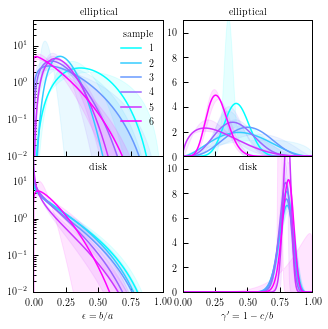

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(5.0,5.0), sharex=True)
plt.subplots_adjust(wspace=0.15, hspace=0)

x = np.linspace(0,1,1000)
axes = axes.flatten()
lines = []
for i, sample in enumerate(samples):

    d = {'disk_shape_mu_1_centrals': t['col1'][i],
         'disk_shape_mu_2_centrals': t['col4'][i],
         'disk_shape_sigma_1_centrals': t['col7'][i],
         'disk_shape_sigma_2_centrals': t['col10'][i],
         'elliptical_shape_mu_1_centrals': t['col13'][i],
         'elliptical_shape_mu_2_centrals': t['col16'][i],
         'elliptical_shape_sigma_1_centrals': t['col19'][i],
         'elliptical_shape_sigma_2_centrals': t['col22'][i],
         'f_disk': t['col25'][i]}
    dl = {'disk_shape_mu_1_centrals': t['col2'][i],
         'disk_shape_mu_2_centrals': t['col5'][i],
         'disk_shape_sigma_1_centrals': t['col8'][i],
         'disk_shape_sigma_2_centrals': t['col11'][i],
         'elliptical_shape_mu_1_centrals': t['col14'][i],
         'elliptical_shape_mu_2_centrals': t['col17'][i],
         'elliptical_shape_sigma_1_centrals': t['col20'][i],
         'elliptical_shape_sigma_2_centrals': t['col23'][i],
         'f_disk': t['col25'][i]}
    dh = {'disk_shape_mu_1_centrals': t['col3'][i],
         'disk_shape_mu_2_centrals': t['col6'][i],
         'disk_shape_sigma_1_centrals': t['col9'][i],
         'disk_shape_sigma_2_centrals': t['col12'][i],
         'elliptical_shape_mu_1_centrals': t['col15'][i],
         'elliptical_shape_mu_2_centrals': t['col18'][i],
         'elliptical_shape_sigma_1_centrals': t['col21'][i],
         'elliptical_shape_sigma_2_centrals': t['col24'][i],
         'f_disk': t['col25'][i]}
    
    for key in disk_shape_model.param_dict.keys():
        disk_shape_model.param_dict[key] = d[key]
        disk_shape_model_l.param_dict[key] = dl[key]
        disk_shape_model_h.param_dict[key] = dh[key]
    for key in elliptical_shape_model.param_dict.keys():
        elliptical_shape_model.param_dict[key] = d[key]
        elliptical_shape_model_l.param_dict[key] = dl[key]
        elliptical_shape_model_h.param_dict[key] = dh[key]
    
    color = plt.cm.cool(np.linspace(0,1,6))[i]
    print(color)
    
    ax = axes[0]
    ax.set_title('elliptical', fontsize=10)
    p = elliptical_shape_model.epsilon_pdf(x)
    pl = elliptical_shape_model_l.epsilon_pdf(x)
    ph = elliptical_shape_model_h.epsilon_pdf(x)
    l, = ax.plot(x, p, color=color)
    ax.fill_between(x, pl, ph, color=color, alpha=0.1)
    ax.set_yscale('log')
    ax.set_ylim([0.01,50])
    ax.set_xlim([0,1])
    
    lines.append(l)

    ax = axes[1]
    ax.set_title('elliptical', fontsize=10)
    p = elliptical_shape_model.gamma_prime_pdf(x)
    pl = elliptical_shape_model_l.gamma_prime_pdf(x)
    ph = elliptical_shape_model_h.gamma_prime_pdf(x)
    ax.plot(x, p, color=color)
    ax.fill_between(x, pl, ph, color=color, alpha=0.1)
    ax.set_ylim([0,11])
    
    ax = axes[2]
    ax.set_title('disk', fontsize=10, pad=-13)
    p = disk_shape_model.epsilon_pdf(x)
    pl = disk_shape_model_l.epsilon_pdf(x)
    ph = disk_shape_model_h.epsilon_pdf(x)
    ax.plot(x, p, color=color)
    ax.fill_between(x, pl, ph, color=color, alpha=0.1)
    ax.set_yscale('log')
    ax.set_ylim([0.01,50])
    ax.set_xlabel(r'$\epsilon = b/a$')

    ax = axes[3]
    ax.set_title('disk', fontsize=10, pad=-13)
    p = disk_shape_model.gamma_prime_pdf(x)
    pl = disk_shape_model_l.gamma_prime_pdf(x)
    ph = disk_shape_model_h.gamma_prime_pdf(x)
    ax.plot(x, p, color=color)
    ax.fill_between(x, pl, ph, color=color, alpha=0.1)
    ax.set_ylim([0,11])
    ax.set_xlabel(r'$\gamma^{\prime} = 1-c/b$')

axes[0].legend(lines,['1','2','3','4','5','6'],title='sample',frameon=False, loc='upper right')
plt.show()

fpath = './figures/'
fname = 'model_fit_axis_distributions_2.pdf'
fig.savefig(fpath + fname, dpi=250)